In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-datasetv3/README.dataset.txt
/kaggle/input/skin-cancer-datasetv3/README.roboflow.txt
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0029387_jpg.rf.c790337dff5b55777a7ceedb7ab82d21.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0029842_jpg.rf.0b11155f89407f7c49521a795bfab6b1.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0029273_jpg.rf.e1a7e845b0152533c6a794fe9b1feaba.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0034122_jpg.rf.a11aba7c75a49ffc1813fe0ab7376eb5.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0033031_jpg.rf.d2d74399d92b1b2bcecd237d76f3dce7.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0026548_jpg.rf.44611a49337de8144eceeeae2d58b186.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0032932_jpg.rf.9b349b5a3012eca59c2b3eb7fb24992c.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0029646_jpg.rf.9ae62ae010959e6206f2ab98590f6a4b.jpg
/kaggle/input/skin-cancer-datasetv3/valid/ISIC_0027131_jpg.rf.463833b18582a3472ce5c6a5c3e5e049.jp

In [2]:
!pip -q install --upgrade --no-warn-script-location ultralytics albumentations pycocotools torchmetrics tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


## 🧩 COCO → YOLO Segmentation Conversion

This section converts the **COCO-format segmentation dataset** into the **YOLO segmentation format**, preparing it for YOLOv8 or YOLOv11 segmentation model training using the **Ultralytics** framework.

---

#### ⚙️ Step 1: Library Installation
The following Python packages are installed:
- **`pycocotools`** → to handle COCO JSON annotations  
- **`tqdm`** → for progress visualization  
- **`ultralytics`** → YOLO training and evaluation tools  

---

#### 🧠 Step 2: Conversion Process
A custom function performs the following operations:
1. **Loads COCO annotations** (`_annotations.coco.json`) for each dataset split (`train`, `valid`, `test`).  
2. **Creates YOLO-style folders** — `images/` and `labels/`.  
3. **Converts segmentation polygons** into **YOLO-normalized coordinates** (values between 0 and 1).  
4. **Generates YOLO label files** (`.txt`) in the format:
5. **Copies images** into the respective YOLO `images/` directory.  
6. **Processes all splits automatically** to ensure consistency.  

---

#### 🔁 Step 3: Split Processing
All three dataset splits — **train**, **valid**, and **test** — are converted sequentially.  
The final YOLO-formatted dataset is saved inside:
/kaggle/working/dataset/
│
├── train/
│ ├── images/
│ └── labels/
│
├── valid/
│ ├── images/
│ └── labels/
│
└── test/
├── images/
└── labels/

---

Each `.txt` file corresponds to its image and contains polygon coordinates describing the segmentation mask in YOLO format.  
All coordinates are **normalized** relative to image width and height.


In [3]:
import os, json, shutil
from tqdm import tqdm

def coco_to_yolo_segmentation(coco_json, output_dir):
    with open(coco_json, 'r') as f:
        data = json.load(f)

    # Prepare mapping
    id_to_filename = {img['id']: img['file_name'] for img in data['images']}
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)

    # Copy images and make YOLO labels
    for ann in tqdm(data['annotations'], desc=f"Converting {coco_json}"):
        image_id = ann['image_id']
        category_id = ann['category_id'] - 1 
        segmentation = ann['segmentation'][0]

        # Normalize segmentation points
        image_info = next((img for img in data['images'] if img['id'] == image_id), None)
        w, h = image_info['width'], image_info['height']
        seg_norm = [f"{x/w:.6f} {y/h:.6f}" for x, y in zip(segmentation[::2], segmentation[1::2])]

        # Write label file
        label_path = os.path.join(output_dir, 'labels', id_to_filename[image_id].replace('.jpg', '.txt'))
        with open(label_path, 'w') as f:
            f.write(f"{category_id} " + " ".join(seg_norm) + "\n")

        # Move image to images/ folder
        src_img = os.path.join(os.path.dirname(coco_json), id_to_filename[image_id])
        dst_img = os.path.join(output_dir, 'images', id_to_filename[image_id])
        if os.path.exists(src_img):
            shutil.copy(src_img, dst_img)

# === Convert all splits ===
base = "/kaggle/input/skin-cancer-datasetv3"
for split in ['train', 'valid', 'test']:
    coco_file = os.path.join(base, split, "_annotations.coco.json")
    out_dir = os.path.join("/kaggle/working/dataset", split)
    coco_to_yolo_segmentation(coco_file, out_dir)

print("✅ Conversion complete! Dataset now ready in /kaggle/working/dataset/")

Converting /kaggle/input/skin-cancer-datasetv3/train/_annotations.coco.json: 100%|██████████| 11903/11903 [00:42<00:00, 283.35it/s]
Converting /kaggle/input/skin-cancer-datasetv3/valid/_annotations.coco.json: 100%|██████████| 2000/2000 [00:06<00:00, 293.77it/s]
Converting /kaggle/input/skin-cancer-datasetv3/test/_annotations.coco.json: 100%|██████████| 1000/1000 [00:02<00:00, 342.44it/s]

✅ Conversion complete! Dataset now ready in /kaggle/working/dataset/


## Dataset Re-Splitting (80% Train / 10% Validation / 10% Test)

This section **re-splits the entire dataset** into a clean and reproducible  
**80% training, 10% validation, and 10% test** split.

### 🔹 Why re-splitting is necessary

- The original dataset already contains `train`, `valid`, and `test` folders
- However, these splits may be:
  - Uneven
  - Dataset-specific
  - Biased due to collection order
- For **fair evaluation** and **experimental consistency**, a fresh random split is applied

This ensures:
- No data leakage
- Balanced distribution across splits
- Reproducible experiments (fixed random seed)

---

### 🔹 Key Steps Performed

#### 1️⃣ Collect All Data
- All images from existing `train`, `valid`, and `test` directories are gathered
- Corresponding YOLO segmentation labels (`.txt`) are collected

#### 2️⃣ Temporary Safe Storage
- All images and labels are moved to a temporary directory:
/kaggle/working/_tmp_all_data/
├── images/
└── labels/

markdown
Copy code
This prevents overwriting or losing files during reorganization.

#### 3️⃣ Randomized Split (80 / 10 / 10)
- Dataset is shuffled using a fixed random seed (`SEED = 42`)
- Split ratios:
  - **80%** → Training
  - **10%** → Validation
  - **10%** → Test

#### 4️⃣ Rebuild YOLO-Compatible Structure
The dataset is reconstructed into the standard YOLO format:

/kaggle/working/dataset/
├── train/
│ ├── images/
│ └── labels/
├── valid/
│ ├── images/
│ └── labels/
└── test/
├── images/
└── labels/

yaml
Copy code

Each image has a corresponding segmentation label file with the same filename.

#### 5️⃣ Automatic Verification
- The final number of images and labels per split is printed
- This confirms:
  - No missing labels
  - Correct distribution
  - Successful re-split

---

### 🔹 Reproducibility & Best Practices

- Fixed random seed ensures identical splits across runs
- Labels always follow their corresponding images
- Temporary directory is removed after completion to save disk space

This re-splitting strategy is **safe, reproducible, and fully compatible with YOLO segmentation training pipelines**.


In [4]:
import os, glob, random, shutil
from pathlib import Path

# ============================================================
# DATASET SPLIT: 80% Train / 10% Val / 10% Test (RE-SPLIT)
# ============================================================

SEED = 42
random.seed(SEED)

BASE_DATASET = "/kaggle/working/dataset"

# Temporary storage to avoid overwrite issues
TMP_DATASET = "/kaggle/working/_tmp_all_data"

# Create temp dirs
os.makedirs(f"{TMP_DATASET}/images", exist_ok=True)
os.makedirs(f"{TMP_DATASET}/labels", exist_ok=True)

# ------------------------------------------------------------
# 1) Collect ALL images from existing train / valid / test
# ------------------------------------------------------------
all_images = []
for split in ["train", "valid", "test"]:
    all_images += glob.glob(f"{BASE_DATASET}/{split}/images/*")

if not all_images:
    raise RuntimeError("No images found to re-split")

# Move images + labels to temp
for img in all_images:
    img_name = os.path.basename(img)
    old_split = img.split("/")[-3]  # train / valid / test
    lbl_src = f"{BASE_DATASET}/{old_split}/labels/{Path(img_name).stem}.txt"

    shutil.move(img, f"{TMP_DATASET}/images/{img_name}")
    if os.path.exists(lbl_src):
        shutil.move(lbl_src, f"{TMP_DATASET}/labels/{Path(img_name).stem}.txt")

# Clean original dataset dirs
for split in ["train", "valid", "test"]:
    shutil.rmtree(f"{BASE_DATASET}/{split}")

# Recreate dataset structure
for split in ["train", "valid", "test"]:
    os.makedirs(f"{BASE_DATASET}/{split}/images", exist_ok=True)
    os.makedirs(f"{BASE_DATASET}/{split}/labels", exist_ok=True)

# ------------------------------------------------------------
# 2) Perform 80 / 10 / 10 split
# ------------------------------------------------------------
image_paths = glob.glob(f"{TMP_DATASET}/images/*")
random.shuffle(image_paths)

n = len(image_paths)
train_end = int(0.8 * n)
val_end   = train_end + int(0.1 * n)

splits = {
    "train": image_paths[:train_end],
    "valid": image_paths[train_end:val_end],
    "test":  image_paths[val_end:]
}

# ------------------------------------------------------------
# 3) Copy back to BASE_DATASET
# ------------------------------------------------------------
for split, imgs in splits.items():
    for img in imgs:
        img_name = os.path.basename(img)
        lbl_name = Path(img_name).stem + ".txt"

        shutil.move(img, f"{BASE_DATASET}/{split}/images/{img_name}")

        lbl_src = f"{TMP_DATASET}/labels/{lbl_name}"
        if os.path.exists(lbl_src):
            shutil.move(lbl_src, f"{BASE_DATASET}/{split}/labels/{lbl_name}")

# Remove temp
shutil.rmtree(TMP_DATASET)

# ------------------------------------------------------------
# 4) Verification
# ------------------------------------------------------------
print("✅ Dataset re-split completed (80/10/10):")
for split in ["train", "valid", "test"]:
    n_img = len(glob.glob(f"{BASE_DATASET}/{split}/images/*"))
    n_lbl = len(glob.glob(f"{BASE_DATASET}/{split}/labels/*"))
    print(f"{split.upper():5s} → images: {n_img}, labels: {n_lbl}")


✅ Dataset re-split completed (80/10/10):
TRAIN → images: 11922, labels: 11922
VALID → images: 1490, labels: 1490
TEST  → images: 1491, labels: 1491


## 🧪 Labeled–Unlabeled Split with FixMatch-Style Setup

This section prepares the dataset for **semi-supervised learning (SSL)** by
splitting the training data into **labeled** and **unlabeled** subsets and
defining **FixMatch-style weak and strong augmentations**.

---

### 🔹 Reproducibility and Configuration

- A fixed random seed (`SEED = 42`) is applied to ensure reproducible experiments  
- Key SSL parameters are defined, including:
  - **Labeled fraction** (20%)
  - **Warm-up epochs** (supervised-only training)
  - **FixMatch epochs** (labeled + pseudo-labeled training)
  - **Image size**, **batch size**, and **confidence threshold**
- Separate directories are created for labeled and unlabeled data storage

---

### 🔹 FixMatch-Style Data Augmentation

Two augmentation pipelines are defined following the FixMatch paradigm:

#### 🟢 Weak Augmentation
- Minimal transformations (resize only)
- Used to generate **reliable predictions** on unlabeled data

#### 🔴 Strong Augmentation
- Same geometric transformation as weak augmentation
- Additional color jitter, brightness/contrast changes, noise, and blur
- Used to enforce **consistency regularization**

These augmentations enable robust pseudo-label generation under distribution
perturbations.

---

### 🔹 Key Steps Performed

#### 1️⃣ Training Data Collection
- All images from the training split are collected
- Only valid image formats are considered
- The dataset is randomly shuffled to avoid sampling bias

---

#### 2️⃣ Labeled / Unlabeled Partitioning
- The training set is split into:
  - **20% labeled images** with ground-truth annotations
  - **80% unlabeled images** without annotations
- This simulates a low-label learning scenario

---

#### 3️⃣ Data Organization

**Labeled subset**
- Images and corresponding YOLO segmentation labels are copied
- Missing labels trigger an error to ensure data integrity

**Unlabeled subset**
- Only images are copied (labels intentionally excluded)

The resulting structure is:

```text
/kaggle/working/
├── ts_labeled/
│   ├── images/
│   └── labels/
└── ts_unlabeled/
    └── images/


In [5]:
import os, glob, random, shutil, yaml
import numpy as np
from ultralytics import YOLO
import albumentations as A

# ============================================================
# 0) Reproducibility
# ============================================================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ============================================================
# 1) Paths & constants
# ============================================================
BASE_DATASET = "/kaggle/working/dataset"

LABELED_PATH   = "/kaggle/working/ts_labeled"
UNLABELED_PATH = "/kaggle/working/ts_unlabeled"

os.makedirs(f"{LABELED_PATH}/images", exist_ok=True)
os.makedirs(f"{LABELED_PATH}/labels", exist_ok=True)
os.makedirs(f"{UNLABELED_PATH}/images", exist_ok=True)


LABELED_FRACTION = 0.2      # 20% labeled, 80% unlabeled
WARMUP_EPOCHS    = 50       # supervised-only epochs
FIXMATCH_EPOCHS  = 50        # training on labeled + pseudo-labeled
IMGSZ            = 640
BATCH            = 8
DEVICE           = 0        # GPU id or "cpu"
PSEUDO_CONF_TH   = 0.7      # FixMatch-style high confidence threshold
MAX_PSEUDO       = None     # e.g. 500 to cap for speed
NUM_CLASSES = 2
CLASS_NAMES = ["affected", "non"]

# ============================================================
# 1) Weak & Strong augmentations (FixMatch style)
#    Weak: minimal transform (reliable prediction)
#    Strong: same geometry + heavier color/blur/noise
# ============================================================
weak_aug = A.Compose([
    A.Resize(IMGSZ, IMGSZ),
])

strong_aug = A.Compose([
    A.Resize(IMGSZ, IMGSZ),
    A.ColorJitter(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(p=0.4),
    A.MotionBlur(p=0.3),
])

# ============================================================
# 2) Collect training images
# ============================================================
all_train_imgs = [
    p for p in glob.glob(f"{BASE_DATASET}/train/images/*.*")
    if p.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"))
]

if not all_train_imgs:
    raise RuntimeError("No training images found")

random.shuffle(all_train_imgs)

# ============================================================
# 3) 20% labeled / 80% unlabeled split
# ============================================================
split_idx = int(len(all_train_imgs) * LABELED_FRACTION)

labeled_imgs   = all_train_imgs[:split_idx]
unlabeled_imgs = all_train_imgs[split_idx:]

# ============================================================
# 4) Copy labeled data (images + labels)
# ============================================================
def copy_labeled(image_paths, dst_root):
    for img in image_paths:
        base = os.path.splitext(os.path.basename(img))[0]
        lbl  = img.replace("/images/", "/labels/").rsplit(".", 1)[0] + ".txt"
        shutil.copy(img, f"{dst_root}/images/{os.path.basename(img)}")
        if not os.path.exists(lbl):
            raise RuntimeError(f"Missing label for {img}")
        shutil.copy(lbl, f"{dst_root}/labels/{base}.txt")

# ============================================================
# 5) Copy unlabeled data (images only)
# ============================================================
def copy_unlabeled(image_paths, dst_root):
    for img in image_paths:
        shutil.copy(img, f"{dst_root}/images/{os.path.basename(img)}")

copy_labeled(labeled_imgs, LABELED_PATH)
copy_unlabeled(unlabeled_imgs, UNLABELED_PATH)

# ============================================================
# 6) Create YAML for LABELED training
# ============================================================
labeled_yaml = {
    "path": "/kaggle/working",
    "train": "ts_labeled/images",
    "val": "dataset/valid/images",
    "test": "dataset/test/images",
    "nc": NUM_CLASSES,
    "names": CLASS_NAMES
}

yaml_path = "/kaggle/working/labeled.yaml"
with open(yaml_path, "w") as f:
    yaml.dump(labeled_yaml, f)

print(f"✅ Labeled YAML created at {yaml_path}")
print(f"📊 Labeled: {len(labeled_imgs)}, Unlabeled: {len(unlabeled_imgs)}")
print("✅ SSL split + YAML creation completed")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Labeled YAML created at /kaggle/working/labeled.yaml
📊 Labeled: 2384, Unlabeled: 9538
✅ SSL split + YAML creation completed


## 📝 YOLO Dataset Configuration for Labeled Training

This section generates a **YOLO-compatible dataset configuration file**
(`ts_labeled.yaml`) for training models using the **labeled subset only**.

---

### 🔹 Purpose of the Configuration File

The YAML file defines:
- The **root dataset path**
- The **training images** from the labeled subset
- The **validation and test splits** for evaluation
- The **number of classes** and their corresponding names

This configuration is required by the Ultralytics YOLO framework to correctly
load data during training and evaluation.

---

### 🔹 Key Steps Performed

#### 1️⃣ Define Dataset Paths
- Training data is set to `ts_labeled/images`
- Validation data uses the original validation split
- Test data uses the original test split

---

#### 2️⃣ Write YOLO YAML File
- The configuration is written using `yaml.safe_dump`
- Key ordering is preserved for readability and clarity
- The generated YAML file is printed to verify correctness

---

### 🔹 Output

The resulting configuration file (`ts_labeled.yaml`) enables **supervised
training on the labeled dataset**, serving as the foundation for teacher model
training or SSL warm-up phases.


In [6]:
DATA_YAML_LABELED = "/kaggle/working/ts_labeled.yaml"
with open(DATA_YAML_LABELED, "w") as f:
    yaml.safe_dump({
        "path": "/kaggle/working",
        "train": "ts_labeled/images",
        "val":   "dataset/valid/images",
        "test":  "dataset/test/images",
        "nc": NUM_CLASSES,
        "names": CLASS_NAMES
    }, f, sort_keys=False)

print(open(DATA_YAML_LABELED).read())


path: /kaggle/working
train: ts_labeled/images
val: dataset/valid/images
test: dataset/test/images
nc: 2
names:
- affected
- non



## 🔥 Warm-Up Training (Supervised Baseline)

This section performs a **warm-up training phase** using only the **labeled
subset** of the dataset. The goal is to obtain a strong **supervised baseline
model** before introducing unlabeled data in the FixMatch-based
semi-supervised learning process.

---

### 🔹 Purpose of Warm-Up Training

- Establishes a reliable **initial teacher model**
- Stabilizes training before pseudo-label generation
- Prevents noisy predictions on unlabeled data during early training
- Serves as a supervised performance baseline for comparison

---

### 🔹 Key Steps Performed

#### 1️⃣ Model Initialization
- A **YOLOv11 segmentation model** is initialized
- Pretrained weights are loaded to leverage transfer learning
- The segmentation head enables pixel-level mask prediction

---

#### 2️⃣ Supervised Training on Labeled Data
- Training is performed using the labeled dataset configuration
- Only ground-truth annotations are used (no pseudo-labels)
- Automatic mixed precision (AMP) is enabled for efficiency
- Early stopping is applied to prevent overfitting

Training outputs are stored in:
```text
/kaggle/working/fm_runs/fm_warmup_teacher/


In [7]:
# ============================================================
# 4) Warmup training → supervised baseline YOLOv11
# ============================================================
base_model = YOLO("yolo11n-seg.yaml").load("yolo11n-seg.pt")

warmup_results = base_model.train(
    data=DATA_YAML_LABELED,
    epochs=WARMUP_EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    device=DEVICE,
    project="/kaggle/working/fm_runs",
    name="fm_warmup_teacher",
    exist_ok=True,
    patience=10,
    amp=True,
)

warmup_best = f"{warmup_results.save_dir}/weights/best.pt"
print("✅ Warmup best checkpoint:", warmup_best)

model = YOLO(warmup_best)


Transferred 561/561 items from pretrained weights
Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/ts_labeled.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=fm_warmup_teacher, nbs=64, nms=False, opset=None, optimize=False, optimi

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1490       1490      0.984      0.982      0.992       0.89      0.984      0.982      0.992      0.876
              affected       1490       1490      0.984      0.982      0.992       0.89      0.984      0.982      0.992      0.876
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/fm_runs/fm_warmup_teacher
✅ Warmup best checkpoint: /kaggle/working/fm_runs/fm_warmup_teacher/weights/best.pt


## 🏷️ FixMatch Pseudo-Label Generation

This section generates **pseudo-labels for unlabeled images** using the
**FixMatch framework**, where predictions from **weakly augmented images** are
used as supervision for **strongly augmented images**.

---

### 🔹 Purpose of FixMatch Pseudo-Labeling

- Leverages unlabeled data to improve model performance
- Uses **high-confidence predictions** as pseudo ground truth
- Enforces **consistency regularization** between weak and strong augmentations
- Reduces reliance on manual annotations

---

### 🔹 Key Steps Performed

#### 1️⃣ Unlabeled Data Preparation
- All unlabeled images are selected for pseudo-labeling
- Dedicated directories are created for pseudo-labeled images and labels

```text
/kaggle/working/ts_pseudo/
├── images/
└── labels/


In [8]:
# ============================================================
# 5) FixMatch pseudo-labeling
# ============================================================
import cv2
FM_PSEUDO_PATH = "/kaggle/working/ts_pseudo"

os.makedirs(f"{FM_PSEUDO_PATH}/images", exist_ok=True)
os.makedirs(f"{FM_PSEUDO_PATH}/labels", exist_ok=True)
to_label = unlabeled_imgs

def write_seg_label_file(out_txt, classes, masks_xy, img_shape):
    h, w = img_shape
    with open(out_txt, "w") as f:
        for cls_id, poly in zip(classes, masks_xy):
            if poly is None or len(poly) < 3:
                continue
            poly = np.array(poly, dtype=np.float32)
            poly[:, 0] /= w
            poly[:, 1] /= h
            coords = " ".join([f"{v:.6f}" for v in poly.reshape(-1)])
            f.write(f"{int(cls_id)} {coords}\n")

for img_path in tqdm(to_label, desc="FixMatch pseudo-labels"):
    img = cv2.imread(img_path)
    if img is None:
        continue

    weak = weak_aug(image=img)["image"]
    results = model.predict(source=weak, imgsz=IMGSZ, conf=PSEUDO_CONF_TH, verbose=False)
    if not results:
        continue

    r = results[0]
    if r.masks is None or len(r.boxes) == 0:
        continue

    confs = r.boxes.conf.cpu().numpy()
    keep_idx = np.where(confs >= PSEUDO_CONF_TH)[0]
    if keep_idx.size == 0:
        continue

    classes, masks_xy = [], []

    for i in keep_idx:
        polys = r.masks.xy[i]
        if isinstance(polys, list):
            areas = [cv2.contourArea(np.array(p, dtype=np.float32)) for p in polys if len(p)>=3]
            if not areas:
                continue
            poly = polys[int(np.argmax(areas))]
        else:
            poly = polys

        if poly is None or len(poly) < 3:
            continue

        cls_id = int(r.boxes.cls[i].item())
        classes.append(cls_id)
        masks_xy.append(poly)

    strong = strong_aug(image=img)["image"]

    base = os.path.splitext(os.path.basename(img_path))[0]
    out_img = f"{FM_PSEUDO_PATH}/images/{base}.jpg"
    out_lbl = f"{FM_PSEUDO_PATH}/labels/{base}.txt"

    h, w = strong.shape[:2]
    write_seg_label_file(out_lbl, classes, masks_xy, (h, w))
    cv2.imwrite(out_img, strong)

print("✅ Pseudo-labeling complete!")



FixMatch pseudo-labels: 100%|██████████| 9538/9538 [04:37<00:00, 34.42it/s]

✅ Pseudo-labeling complete!


## 🔗 Merging Labeled and FixMatch Pseudo-Labeled Data

This section constructs the **final training dataset** for semi-supervised
learning by merging **ground-truth labeled data** with **FixMatch-generated
pseudo-labeled samples**.

---

### 🔹 Purpose of Dataset Merging

- Combines limited labeled data with high-confidence pseudo-labels
- Expands the effective training set size
- Preserves annotation reliability by prioritizing ground truth
- Prepares a unified dataset for FixMatch student retraining

---

### 🔹 Key Steps Performed

#### 1️⃣ Merged Dataset Initialization
- A dedicated directory is created for the merged dataset
- Existing files are cleared to ensure clean and repeatable runs
- Separate `images/` and `labels/` folders are maintained in YOLO format

```text
/kaggle/working/ts_merged/
├── images/
└── labels/


In [9]:
# ============================================================
# 5) Merge labeled and pseudo-labeled into one training set
# ============================================================

MERGED_PATH = "/kaggle/working/ts_merged"

def ensure_empty(dir_path):
    os.makedirs(dir_path, exist_ok=True)
    for f in glob.glob(f"{dir_path}/*"):
        os.remove(f)

# Clean merged dirs (important for reruns)
ensure_empty(f"{MERGED_PATH}/images")
ensure_empty(f"{MERGED_PATH}/labels")

def safe_merge(src, dst):
    for f in glob.glob(f"{src}/*"):
        name = os.path.basename(f)
        dst_path = os.path.join(dst, name)
        if not os.path.exists(dst_path):
            shutil.copy(f, dst_path)
        # else: keep existing file (ground-truth wins)

# Merge labeled FIRST (ground truth has priority)
safe_merge(f"{LABELED_PATH}/images", f"{MERGED_PATH}/images")
safe_merge(f"{LABELED_PATH}/labels", f"{MERGED_PATH}/labels")

# Merge pseudo-labeled SECOND
safe_merge(f"{FM_PSEUDO_PATH}/images", f"{MERGED_PATH}/images")
safe_merge(f"{FM_PSEUDO_PATH}/labels", f"{MERGED_PATH}/labels")

# ============================================================
# Create YAML for SSL retraining
# ============================================================
DATA_YAML_MERGED = "/kaggle/working/ts_merged.yaml"

with open(DATA_YAML_MERGED, "w") as f:
    yaml.safe_dump({
        "path": "/kaggle/working",
        "train": "ts_merged/images",
        "val":   "dataset/valid/images",
        "test":  "dataset/test/images",
        "nc": NUM_CLASSES,
        "names": CLASS_NAMES
    }, f, sort_keys=False)

print(open(DATA_YAML_MERGED).read())
print("✅ Merged dataset + YAML ready for SSL retraining")


path: /kaggle/working
train: ts_merged/images
val: dataset/valid/images
test: dataset/test/images
nc: 2
names:
- affected
- non

✅ Merged dataset + YAML ready for SSL retraining


## 🎓 FixMatch Student Training on Merged Dataset

This section trains the **FixMatch student model** using the merged dataset that
combines **ground-truth labeled data** with **FixMatch-generated pseudo-labeled
samples**.

---

### 🔹 Purpose of FixMatch Student Training

- Leverages both labeled and unlabeled data for improved generalization
- Refines model predictions using consistency-regularized pseudo-labels
- Builds upon the warm-up teacher checkpoint for stable convergence
- Completes the FixMatch semi-supervised learning pipeline

---

### 🔹 Key Steps Performed

#### 1️⃣ Model Initialization
- A **YOLOv11 segmentation model** is initialized
- The warm-up checkpoint is loaded as the starting point
- This transfers supervised knowledge to the FixMatch training stage

---

#### 2️⃣ Semi-Supervised Training
- Training is performed on the merged dataset configuration
- Both ground-truth and pseudo-labeled annotations are used
- Automatic mixed precision (AMP) is enabled for efficiency
- Early stopping is applied to prevent overfitting

Training outputs are saved in:
```text
/kaggle/working/fm_runs/fm_fixmatch_student/


In [10]:
# ============================================================
# 7) Train YOLOv11 on merged (supervised + pseudo)
# ============================================================
fixmatch_model = YOLO("yolo11n-seg.yaml").load(warmup_best)

fm_results = fixmatch_model.train(
    data=DATA_YAML_MERGED,
    epochs=FIXMATCH_EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    device=DEVICE,
    project="/kaggle/working/fm_runs",
    name="fm_fixmatch_student",
    exist_ok=True,
    patience=10,
    amp=True,
)

fm_best = f"{fm_results.save_dir}/weights/best.pt"
print("✅ FixMatch best checkpoint:", fm_best)

Transferred 510/561 items from pretrained weights
Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/ts_merged.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=fm_fixmatch_student, nbs=64, nms=False, opset=None, optimize=False, optim

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1490       1490      0.981      0.981      0.992      0.894      0.982      0.983      0.993      0.877
              affected       1490       1490      0.981      0.981      0.992      0.894      0.982      0.983      0.993      0.877
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /kaggle/working/fm_runs/fm_fixmatch_student
✅ FixMatch best checkpoint: /kaggle/working/fm_runs/fm_fixmatch_student/weights/best.pt


## 📈 FixMatch Student Training Curve Visualization

This section visualizes the **training and validation performance curves** of the
FixMatch-trained YOLOv11 segmentation student model.

---

### 🔹 Purpose of Curve Visualization

- Summarizes model optimization behavior across epochs
- Displays loss convergence and evaluation metric trends
- Helps assess training stability and potential overfitting
- Supports qualitative interpretation of FixMatch effectiveness

---

### 🔹 Key Steps Performed

#### 1️⃣ Automatic Curve Retrieval
- The script automatically locates the `results.png` file generated by the
  Ultralytics training pipeline
- No hard-coded filenames are used, ensuring robustness across runs

---

#### 2️⃣ Curve Display
- The combined training and validation curves are displayed in a single figure
- The plot includes loss trajectories and performance metrics across epochs
- Visualization is rendered using Matplotlib for clarity

---

### 🔹 Outcome

The displayed curves provide a concise overview of the FixMatch student model’s
learning dynamics and serve as supporting evidence for the effectiveness of the
semi-supervised training strategy.


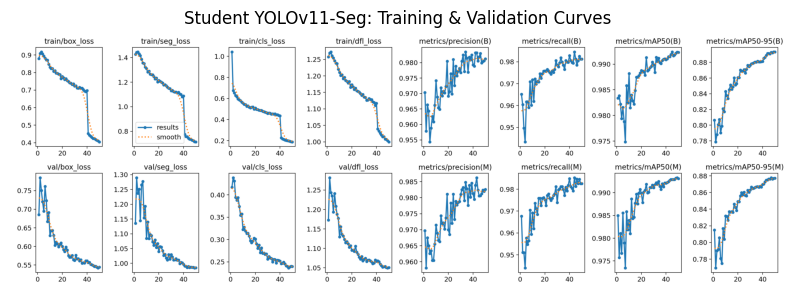

In [11]:
import os
import matplotlib.pyplot as plt

RUN_DIR = "/kaggle/working/fm_runs/fm_fixmatch_student"

# Automatically find results.png
results_png = None
for f in os.listdir(RUN_DIR):
    if f.lower() == "results.png":
        results_png = os.path.join(RUN_DIR, f)
        break

if results_png is None:
    raise FileNotFoundError("❌ results.png not found in YOLO run directory")

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(plt.imread(results_png))
plt.axis("off")
plt.title("Student YOLOv11-Seg: Training & Validation Curves")
plt.show()


## 📊 Validation Evaluation on Held-Out Dataset

This section evaluates the **trained FixMatch student model** on a **held-out
validation set** to measure its generalization performance.

---

### 🔹 Purpose of Validation Evaluation

- Assesses model performance on unseen data
- Provides an unbiased estimate of segmentation accuracy
- Enables comparison between supervised and semi-supervised models
- Supports quantitative reporting of experimental results

---

### 🔹 Key Steps Performed

#### 1️⃣ Validation Inference
- The trained model is evaluated using the built-in YOLO validation pipeline
- Validation is performed on data excluded from training
- All evaluation metrics are computed automatically

---

#### 2️⃣ Metric Extraction and Reporting
- The complete set of evaluation metrics is printed for transparency
- Key segmentation metrics are extracted:
  - **Mask mAP@0.5**
  - **Mask mAP@0.5:0.95**

These metrics summarize segmentation quality across multiple IoU thresholds and
are used for model comparison and performance analysis.

---

### 🔹 Outcome

The reported validation metrics quantify the effectiveness of the FixMatch-based
semi-supervised learning approach and serve as a basis for further analysis and
discussion.


In [12]:
# Validation on held-out validation set
val_results = model.val(split="val")

# Print all metrics
print(val_results.results_dict)

# Extract key metrics for report
mask_map50 = val_results.results_dict.get("metrics/mAP50(M)", None)
mask_map5095 = val_results.results_dict.get("metrics/mAP50-95(M)", None)

print(f"Mask mAP@0.5: {mask_map50}")
print(f"Mask mAP@0.5:0.95: {mask_map5095}")


Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 721.7±315.9 MB/s, size: 21.6 KB)
val: Scanning /kaggle/working/dataset/valid/labels.cache... 1490 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1490/1490 2.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 94/94 8.1it/s 11.6s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1490       1490      0.984      0.982      0.992       0.89      0.984      0.982      0.992      0.876
              affected       1490       1490      0.984      0.982      0.992       0.89      0.984      0.982      0.992      0.876
Speed: 0.7ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/segment/val
{'metrics/precision(B)': 0.983868489254103, 'metrics/recall(B)': 0.9823969787199763, 'metrics/mAP50(B)': 0.9920262210135333, 'metrics/mAP50-95(B)': 0.8899278602119619, 'metrics/precision(M)': 0.983868489254103, 'metrics/recall(M)': 0.9823969787199763, 'metrics/mAP50(M)': 0.9922453734417261, 'metrics/mAP50-95(M)': 0.875919094628466, 'fitness': 1.7658469548404279}
Mask mAP@0.5: 0.9922453734417261
Mask mAP@0.5:0.95: 0.875919094628466


## 👁️ Qualitative Segmentation Results (FixMatch Student)

This section presents a **qualitative comparison** between **ground-truth
segmentation masks** and **predictions generated by the FixMatch-trained student
model** on the validation dataset.

---

### 🔹 Purpose of Qualitative Evaluation

- Visually assess segmentation quality beyond quantitative metrics
- Inspect object boundaries, shape consistency, and error patterns
- Validate the effectiveness of FixMatch pseudo-labeling
- Identify potential failure cases

---

### 🔹 Key Steps Performed

#### 1️⃣ Sample Selection
- A small subset of images is selected from the validation split
- These samples are not used during training, ensuring unbiased visualization

---

#### 2️⃣ Model Inference
- The FixMatch-trained student model performs segmentation inference
- Predictions are generated using the same confidence threshold applied during
  pseudo-labeling
- All predicted instance masks are merged into a single binary mask per image

---

#### 3️⃣ Ground-Truth Mask Reconstruction
- YOLO segmentation labels are converted back into pixel-level masks
- Polygon coordinates are denormalized and rasterized to form binary masks

---

#### 4️⃣ Visual Comparison
For each image, three views are displayed:
1. Original RGB image  
2. Ground-truth segmentation mask  
3. FixMatch student prediction  

This side-by-side visualization highlights segmentation accuracy, boundary
alignment, and qualitative improvements introduced by the FixMatch framework.

---

### 🔹 Outcome

Qualitative results complement quantitative evaluation metrics and provide
intuitive evidence of the model’s segmentation performance on unseen data.


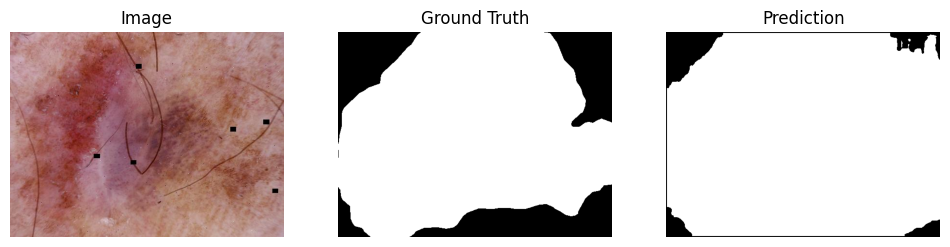

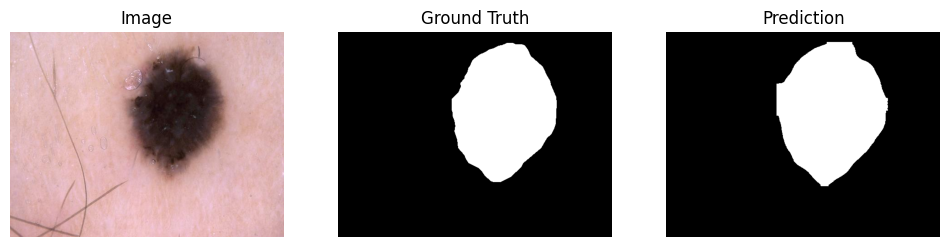

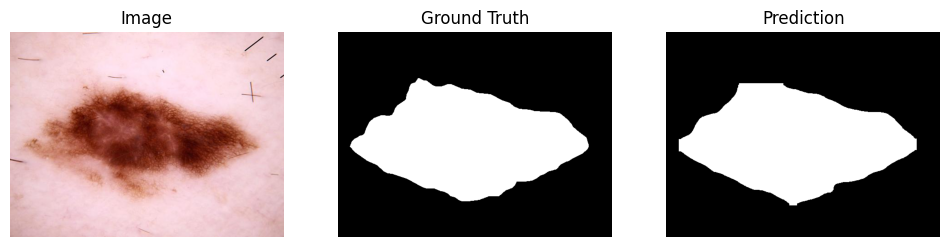

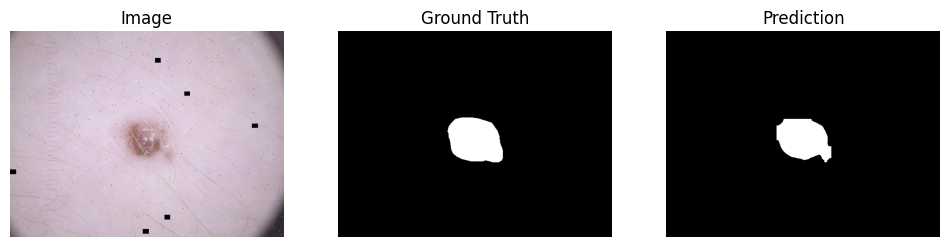

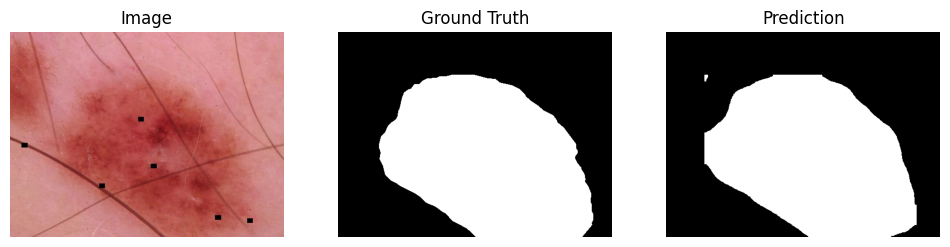

In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob, os
from ultralytics import YOLO

valid_images = glob.glob(f"{BASE_DATASET}/valid/images/*")[:5]
model = YOLO("/kaggle/working/fm_runs/fm_fixmatch_student/weights/best.pt")

for img_path in valid_images:
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    pred = model.predict(
        source=img,
        conf=PSEUDO_CONF_TH,
        imgsz=IMGSZ,
        verbose=False
    )[0]

    # ------------------------
    # Predicted mask (merge all instances)
    # ------------------------
    pred_mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    if pred.masks is not None:
        for m in pred.masks.data:
            m = m.cpu().numpy().astype(np.uint8)
            m = cv2.resize(m, (img.shape[1], img.shape[0]))
            pred_mask = np.maximum(pred_mask, m)

    # ------------------------
    # Ground truth mask
    # ------------------------
    label_path = img_path.replace("images", "labels").rsplit(".", 1)[0] + ".txt"
    gt_mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    if os.path.exists(label_path):
        for line in open(label_path):
            cls, *coords = map(float, line.strip().split())
            pts = np.array(coords, np.float32).reshape(-1, 2)
            pts[:, 0] *= img.shape[1]
            pts[:, 1] *= img.shape[0]
            cv2.fillPoly(gt_mask, [pts.astype(np.int32)], 1)

    # ------------------------
    # Visualization
    # ------------------------
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(img_rgb)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(gt_mask, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(pred_mask, cmap="gray")
    plt.axis("off")

    plt.show()


## 📐 Mean Intersection over Union (mIoU) Evaluation

This section computes the **Mean Intersection over Union (mIoU)** on the
**validation dataset** to quantitatively assess the segmentation accuracy of the
FixMatch-trained YOLOv11 student model.

---

### 🔹 Purpose of mIoU Evaluation

- Provides a **pixel-level overlap measure** between predictions and ground truth
- Complements mAP metrics reported by the YOLO evaluation pipeline
- Offers an intuitive and widely used metric for segmentation quality
- Enables fair comparison across models and training strategies

---

### 🔹 Key Steps Performed

#### 1️⃣ Validation Data Collection
- All images from the validation split are collected
- Each image is evaluated independently to avoid bias

---

#### 2️⃣ Model Inference
- The trained FixMatch student model performs segmentation inference
- Predictions are generated using a fixed confidence threshold
- Segmentation outputs are obtained as polygon masks

---

#### 3️⃣ Mask Reconstruction
- **Predicted masks** are rasterized from polygon coordinates
- **Ground-truth masks** are reconstructed from YOLO segmentation labels
- Both masks are converted to binary pixel-level representations

---

#### 4️⃣ IoU Computation
- Intersection and union are computed for each image
- IoU is calculated as:
  
IoU = |Prediction ∩ Ground Truth| / |Prediction ∪ Ground Truth|

yaml
Copy code

- Special cases with empty masks are handled explicitly

---

#### 5️⃣ Mean IoU Aggregation
- IoU values are accumulated across all validation images
- The final **Mean IoU (mIoU)** is computed as the average IoU over the dataset

---

### 🔹 Outcome

The reported mIoU score provides a **robust pixel-level evaluation** of the
FixMatch-based semi-supervised segmentation model, complementing detection-based
metrics and supporting comprehensive performance analysis.

In [14]:
import cv2
import numpy as np
import glob, os
from ultralytics import YOLO
from tqdm import tqdm

# ============================================================
# Config
# ============================================================
BASE_DATASET = "/kaggle/working/dataset"
IMGSZ = 640
PSEUDO_CONF_TH = 0.7

MODEL_PATH = "/kaggle/working/fm_runs/fm_fixmatch_student/weights/best.pt"
# ⚠️ Update if path differs

# ============================================================
# IoU function
# ============================================================
def compute_iou(pred_mask, gt_mask):
    pred_mask = pred_mask.astype(bool)
    gt_mask   = gt_mask.astype(bool)

    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union        = np.logical_or(pred_mask, gt_mask).sum()

    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    return intersection / union

# ============================================================
# Load model
# ============================================================
model = YOLO(MODEL_PATH)

# ============================================================
# Collect ALL validation images
# ============================================================
valid_images = sorted(glob.glob(f"{BASE_DATASET}/valid/images/*"))
assert len(valid_images) > 0, "No validation images found"

ious = []

# ============================================================
# Evaluation loop
# ============================================================
for img_path in tqdm(valid_images, desc= "Evaluating mIoU"):
    img = cv2.imread(img_path)
    if img is None:
        continue

    H, W = img.shape[:2]

    # ------------------------
    # Prediction
    # ------------------------
    pred = model.predict(
        source=img,
        imgsz=IMGSZ,
        conf=PSEUDO_CONF_TH,
        verbose=False
    )[0]

    # ------------------------
    # Predicted mask (polygon-based)
    # ------------------------
    pred_mask = np.zeros((H, W), dtype=np.uint8)

    if pred.masks is not None:
        for poly in pred.masks.xy:
            if poly is None or len(poly) < 3:
                continue
            pts = np.array(poly, np.int32)
            cv2.fillPoly(pred_mask, [pts], 1)

    # ------------------------
    # Ground truth mask
    # ------------------------
    gt_mask = np.zeros((H, W), dtype=np.uint8)
    label_path = img_path.replace("images", "labels").rsplit(".", 1)[0] + ".txt"

    if os.path.exists(label_path):
        with open(label_path) as f:
            for line in f:
                _, *coords = map(float, line.strip().split())
                pts = np.array(coords, np.float32).reshape(-1, 2)
                pts[:, 0] *= W
                pts[:, 1] *= H
                cv2.fillPoly(gt_mask, [pts.astype(np.int32)], 1)

    # ------------------------
    # IoU
    # ------------------------
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

# ============================================================
# Final Mean IoU
# ============================================================
mean_iou = float(np.mean(ious)) if ious else 0.0
print(f"\n✅ Mean IoU on validation set ({len(ious)} images): {mean_iou:.4f}")


Evaluating mIoU: 100%|██████████| 1490/1490 [00:24<00:00, 60.96it/s]


✅ Mean IoU on validation set (1490 images): 0.8694
